<a href="https://colab.research.google.com/github/sanjay-sss/Stroke-Analysis-EDA-MODELLING/blob/main/CODE/Stroke_analysis_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM:** 

OUR AIM IS TO PREDICT WHETHER A PERSON HAD A STROKE OR NOT BASED ON THE FOLLOWING FEATURES:

id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood
bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

**STEPS WE SHOULD FOLLOW WHILE WORKING ON ML DATASET**

In this Notebook,I have worked on the Exploratory Data Analysis or EDA of the stroke risk dataset. Exploratory Data Analysis or EDA is a first step in analysing a new dataset. The primary objective of EDA is to analyse the data for distribution, outliers and anomalies in the dataset. It includes analysing the data to find the distribution of data, its main characteristics, identifying patterns and visualizations. It also provides tools for hypothesis generation by visualizing and understanding the data through graphical representation.

Feature Engineering is the **Second** Step one should follow while doing any Machine Learning Project. In this step we perform the following things:

**1)**Handle the Missing Values if any

**2)**Handling the Outliers.

**3)**Handling the Categorical Data

**4)**Normalizing the Data for further Model building

The **third** Step is Feature Selection. In this step we use some techniques to identify the important and unnecessary features to feed to our model.

The **Final step** I performed is Building Machine Learning Models: Random Forest, XGBOOST,SVC,Logistic Regression

If the Accuracy is NOT SATISFYING, then we perform Hyper-Parameter Tuning to enhance the performance of our Model

**IMPORT REQUIRED LIBRARIES**


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/My Drive/dataset/healthcare-dataset-stroke-data.csv')
stroke=df

In [13]:
#GET THE FIRST 5 ROWS:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
#GET THE LIST OF COLUMNS IN DATASET:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [15]:
#GET THE STATISTICS OF DATA:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


HERE WE CAN SEE THAT THE COUNT OF **"BMI**" IS LESS COMPARED TO OTHER FEATURES. THAT MEANS BMI HAS SOME NULL VALUES.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


HERE THE CATEGORICAL FEATURES ARE - "GENDER", "EVER_MARRIED", "WORK_TYPE", "RESIDENCE_TYPE", "SMOKING_STATUS".

WE NEED TO HANDLE THESE COLUMNS. (CONVERT TO NUMERIC DATA)

**EDA & FEATURE ENGINEERING**


**EDA**

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In summary, EDA can show us hidden relationships and attributes present in our data even before we throw it at a machine learning model.

**FEATURE ENGINEERING**

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. Feature engineering is fundamental to the application of machine learning and is both difficult and expensive. (source: Wikipedia)

In summary, FE is simply using your existing knowledge of the dataset to create new features that can help a machine learning model perform better

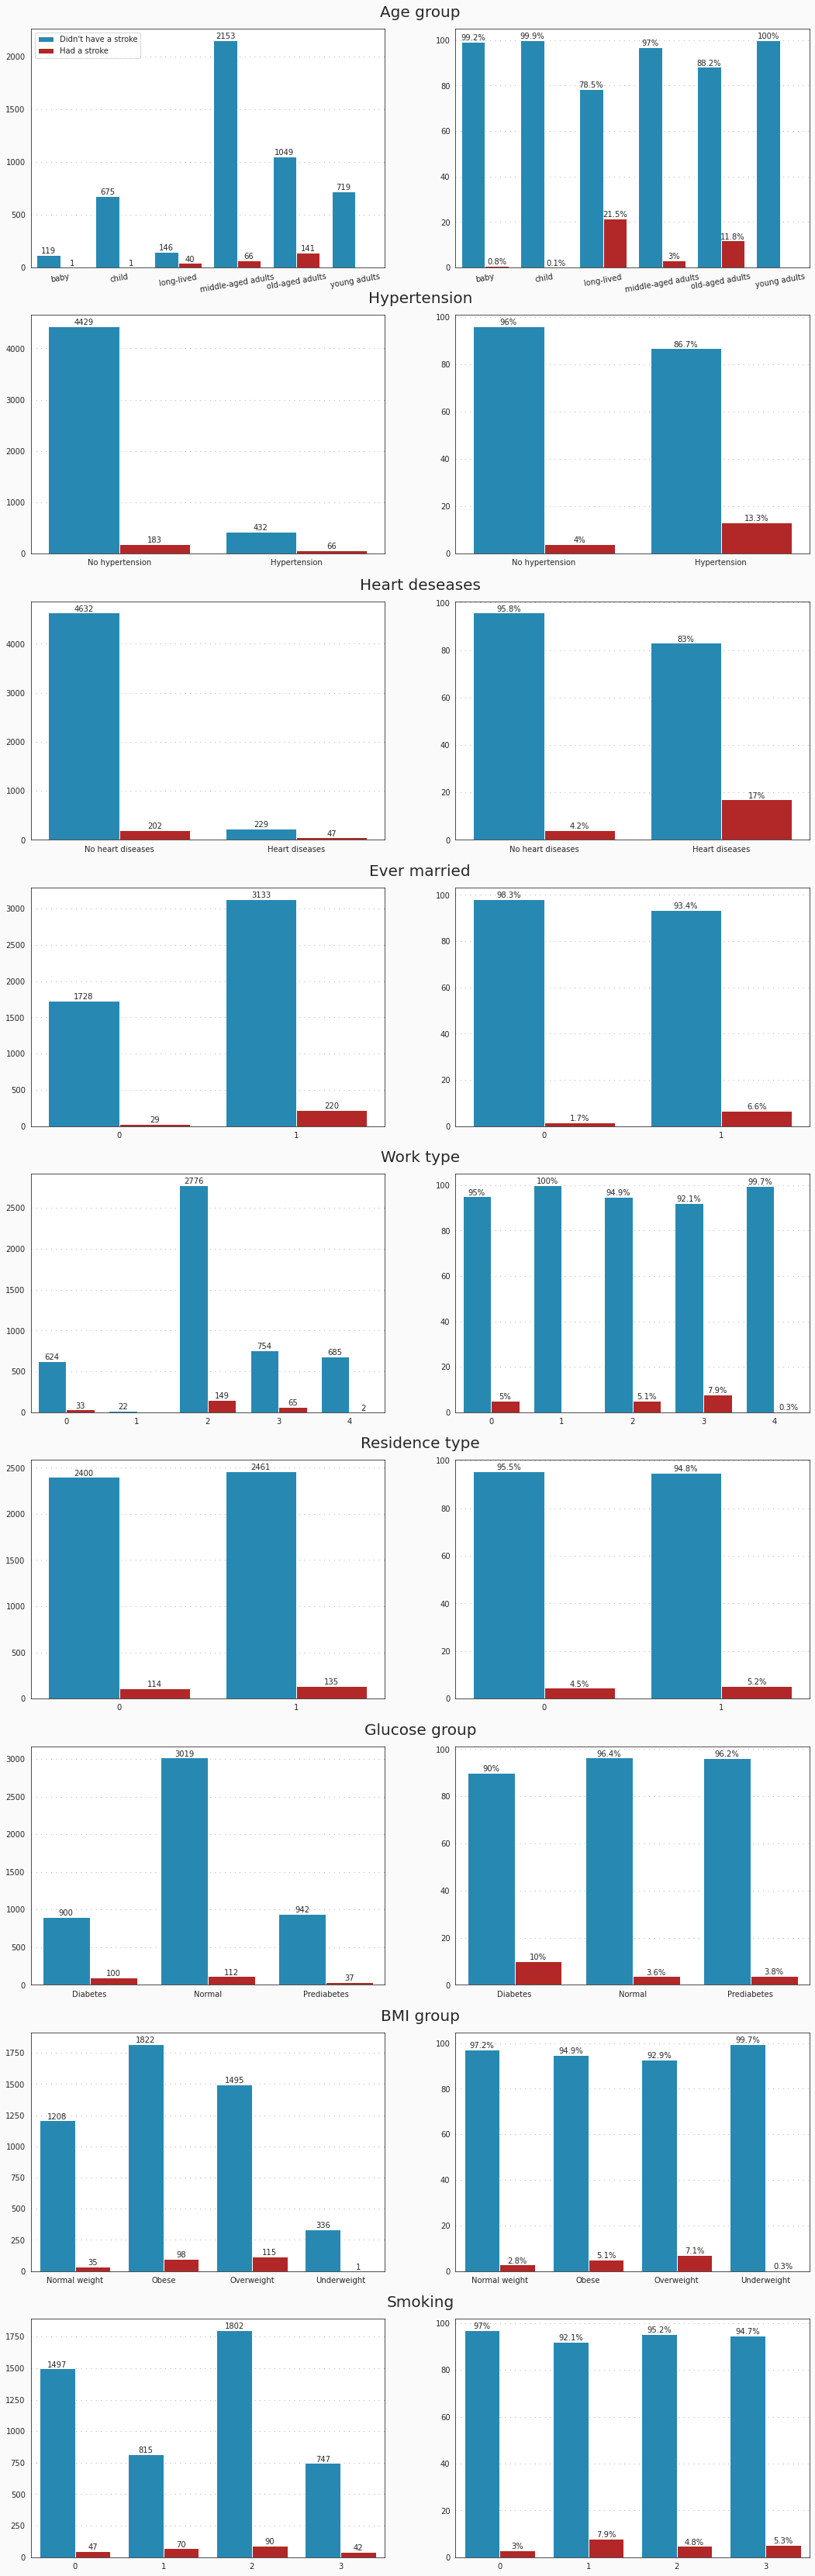

In [41]:
fig = plt.figure(figsize = (18, 60))
fig.patch.set_facecolor('#fafafa')

plt.subplot(921)
sns.set_style('white')
plt.title('Age group', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['count'], hue = dst_st_age['stroke'], palette = ['#1092c9','#c91010'])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend(loc = 'upper left')

plt.subplot(922)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
a2 = sns.barplot(data = dst_st_age, x = dst_st_age['age_group'], y = dst_st_age['percent'], hue = dst_st_age['stroke'], palette = ['#1092c9','#c91010'])
plt.xticks(rotation = 10)
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(923)
sns.set_style('white')
plt.title('Hypertension', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b = sns.barplot(data = hyper, x = hyper['hypertension'], y = hyper['count'], hue = hyper['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(924)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
b2 = sns.barplot(data = hyper, x = hyper['hypertension'], y = hyper['percent'], hue = hyper['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(925)
sns.set_style('white')
plt.title('Heart deseases', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['count'], hue = heart['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(926)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
c2 = sns.barplot(data = heart, x = heart['heart_disease'], y = heart['percent'], hue = heart['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(927)
sns.set_style('white')
plt.title('Ever married', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d = sns.barplot(data = marry, x = marry['ever_married'], y = marry['count'], hue = marry['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(928)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
d2 = sns.barplot(data = marry, x = marry['ever_married'], y = marry['percent'], hue = marry['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(929)
sns.set_style('white')
plt.title('Work type', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e = sns.barplot(data = work, x = work['work_type'], y = work['count'], hue = work['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,10)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
e2 = sns.barplot(data = work, x = work['work_type'], y = work['percent'], hue = work['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,11)
sns.set_style('white')
plt.title('Residence type', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['count'], hue = residence['stroke'], palette = ['#1092c9','#c91010'])

plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)
plt.subplot(9,2,12)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
f2 = sns.barplot(data = residence, x = residence['Residence_type'], y = residence['percent'], hue = residence['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,13)
sns.set_style('white')
plt.title('Glucose group', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['count'], hue = glucose_group['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,14)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
g2 = sns.barplot(data = glucose_group, x = glucose_group['glucose_group'], y = glucose_group['percent'], hue = glucose_group['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,15)
sns.set_style('white')
plt.title('BMI group', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['count'], hue = bmi_group['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,16)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
h2 = sns.barplot(data = bmi_group, x = bmi_group['bmi_group'], y = bmi_group['percent'], hue = bmi_group['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,17)
sns.set_style('white')
plt.title('Smoking', size = 20, x = 1.1, y = 1.03)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['count'], hue = smoking['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

plt.subplot(9,2,18)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', zorder = 0,  dashes = (1,7))
j2 = sns.barplot(data = smoking, x = smoking['smoking_status'], y = smoking['percent'], hue = smoking['stroke'], palette = ['#1092c9','#c91010'])
plt.ylabel('')
plt.xlabel('')
plt.legend('').set_visible(False)

# add annotations
for i in [a,b,c,d,e,f,g,h,j]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

for i in [a2,b2,c2,d2,e2,f2,g2,h2,j2]:
    for p in i.patches:
        height = p.get_height()
        i.annotate(f'{height:g}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 10,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
        
plt.show()


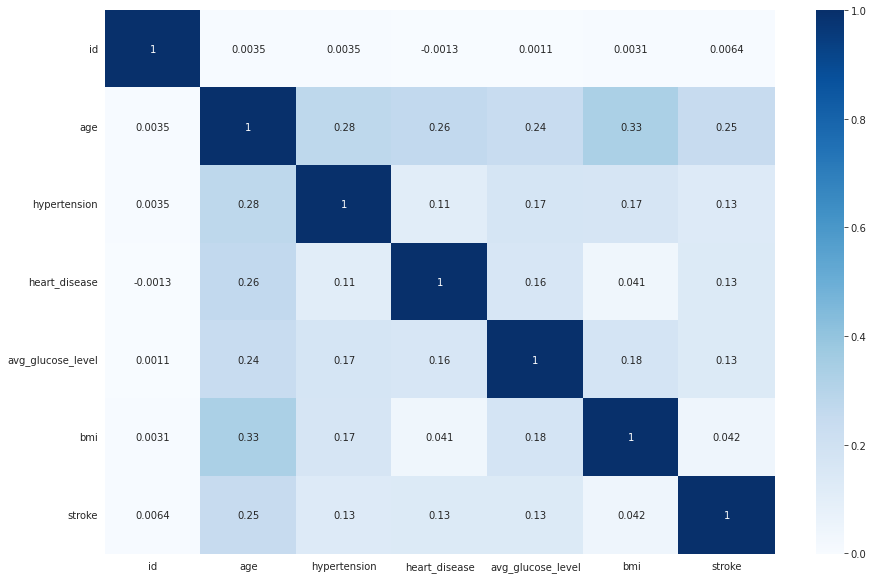

In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')
plt.show()

**Conclusions of EDA**

1)Based on the data, gender does not affect the probability of stroke, but in fact men have a higher risk of stroke, howewer, women have a higher mortality rate from stroke. This is a medical fact.

2)There is a large correlation between age and stroke risk. Almost all doctors know that stroke is most often an age problem. However, this can also happen with childs, in the available data in groups "baby" and "child", 2 people had a stroke.

3)The presence of hypertension or heart diseases have affect on stroke risk

4)People who are married have a higher risk of stroke. I think it's a coincidence.

5)The author of the dataset did not specify what is meant "children" type of work, working with children in kindergartens and schools or caring for their children, but in any case children have a positive impact on the health of adults.

6)Living in a rural or urban areas does not affect the risk of stroke in any way.

7)Smoking also does not affect the risk of stroke. If draw conclusions only by the data, then yes, but if you have at least the slightest knowledge of medicine, you should know that smoking leads to problems with blood vessels, and this in turn can lead to heart diseases or hypertension, which is already a problem.

8)Obesity leads not only to problems with blood vessels and many others, but also to the risk of stroke.

9)Diabetes has an impact on the risk of stroke.

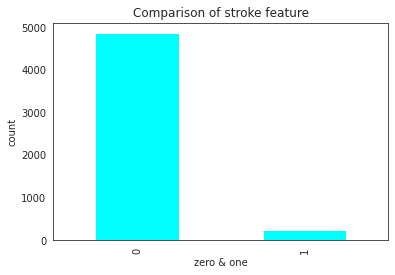

In [18]:
df['stroke'].value_counts(dropna = False).plot.bar(color = 'cyan')
plt.title('Comparison of stroke feature')
plt.xlabel('zero & one')
plt.ylabel('count')
plt.show()

HERE WE CAN SEE THE DATA IS COMPLETELY IMBALANCE. WE'LL HANDLE THIS BELOW.

1. HANDLING MISSING VALUES:

**WHAT ARE MISSING VALUES ?**

Many real-world datasets may contain missing values for various reasons. They are often encoded as NaNs, blanks or any other placeholders. Training a model with a dataset that has a lot of missing values can drastically impact the machine learning model's quality.

**WAYS TO HANDLE MISSING VALUES**:

Deletion

Impute missing values with Mean/Median

Prediction Model

KNN Imputer

In [19]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
#WE ARE REPLACING THE NULL VALUES WITH MEAN OF THAT FEATURE.
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [21]:

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

HERE WE CAN SEE THAT NOW OUR DATA HAVE ZERO NULL VALUES.

**2. CHECK FOR OUTLIERS IN OUR DATA**

**What is an Outlier ?**

Outlier is a commonly used terminology by analysts and data scientists as it needs close attention else it can result in wildly wrong estimations. Simply speaking, Outlier is an observation that appears far away and diverges from an overall pattern in a sample.(SOURCE:Analytics Vidhya)


**What is the impact of Outliers on a dataset?**

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set

It increases the error variance and reduces the power of statistical tests
If the outliers are non-randomly distributed, they can decrease normality
They can bias or influence estimates that may be of substantive interest
They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

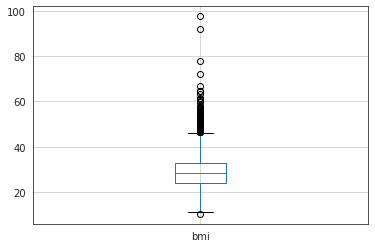

In [22]:
#BMI FEATURE:
df.boxplot(column='bmi')

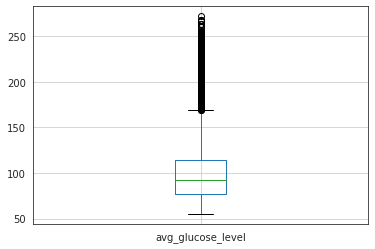

In [23]:
#AVG_GLUCOSE_LEVEL:
df.boxplot(column='avg_glucose_level')

NO NEED TO WORRY ABOUT THESE OUTLIERS. THESE WILL BE HANDLED AUTOMATICALLY BY THE MODEL WE'LL BE USING  **XGBOOST**

**3) HANDLE THE CATEGORICAL VARIABLES USING LABEL ENCODER**

In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])

In [25]:
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender
df['work_type']=work_type
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB


**THE CATEGORICAL FEATURES ARE HANDLED**

**4. REVOME UNNECESSARY COLUMNS IF ANY**

In [27]:
#ID COLUMN IS NOT REQUIRED.
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


**SPLIT THE DATASET INTO X & Y**

In [28]:
X = df.drop('stroke', axis=1)
y = df['stroke']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3577, 10)
Number transactions y_train dataset:  (3577,)
Number transactions X_test dataset:  (1533, 10)
Number transactions y_test dataset:  (1533,)


**5. HANDLING IMBALANCED DATA**

**WE WILL BE USING SMOTE TECHNIQUE TO HANDLE THE IMBALANCED DATA**

In [29]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 173
Before OverSampling, counts of label '0': 3404 

After OverSampling, the shape of train_X: (6808, 10)
After OverSampling, the shape of train_y: (6808,) 

After OverSampling, counts of label '1': 3404
After OverSampling, counts of label '0': 3404


**THE DATA IS NOW BALANCED !!!!!!!!!**

**6. MODEL BUILDING USING THE PRE-PROCESSED / BALANCED DATASET.**

In [30]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
import numpy as np
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train_res, y_train_res)
y_pred = rdf_model.predict(X_test)
print('Training Score: {}'.format(rdf_model.score(X_train_res, y_train_res)))
print('Test Score: {}'.format(rdf_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred,normalize=True, sample_weight=None)

Training Score: 1.0
Test Score: 0.9015003261578604
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1457
           1       0.11      0.14      0.13        76

    accuracy                           0.90      1533
   macro avg       0.53      0.54      0.54      1533
weighted avg       0.91      0.90      0.91      1533



0.9015003261578604

In [31]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_res, y_train_res)
y_pred = xgb_model.predict(X_test)
print('Training Score: {}'.format(xgb_model.score(X_train_res, y_train_res)))
print('Test Score: {}'.format(xgb_model.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred,normalize=True, sample_weight=None)

Training Score: 0.8901292596944771
Test Score: 0.817351598173516
              precision    recall  f1-score   support

           0       0.97      0.83      0.90      1457
           1       0.13      0.49      0.21        76

    accuracy                           0.82      1533
   macro avg       0.55      0.66      0.55      1533
weighted avg       0.93      0.82      0.86      1533



0.817351598173516

In [32]:

log=LogisticRegression()
log.fit(X_train_res, y_train_res)
y_pred = log.predict(X_test)
print('Training Score: {}'.format(log.score(X_train_res, y_train_res)))
print('Test Score: {}'.format(log.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred,normalize=True, sample_weight=None)

Training Score: 0.8034665099882491
Test Score: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1457
           1       0.12      0.58      0.19        76

    accuracy                           0.76      1533
   macro avg       0.54      0.68      0.53      1533
weighted avg       0.93      0.76      0.83      1533



0.7619047619047619

In [34]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_res, y_train_res)
y_pred = svc.predict(X_test)
print('Training Score: {}'.format(svc.score(X_train_res, y_train_res)))
print('Test Score: {}'.format(svc.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred,normalize=True, sample_weight=None)

Training Score: 0.7923031727379554
Test Score: 0.7051532941943901
              precision    recall  f1-score   support

           0       0.99      0.70      0.82      1457
           1       0.12      0.80      0.21        76

    accuracy                           0.71      1533
   macro avg       0.55      0.75      0.52      1533
weighted avg       0.94      0.71      0.79      1533



0.7051532941943901

No handles with labels found to put in legend.


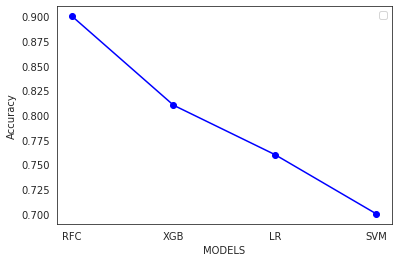

In [35]:

models=['RFC','XGB','LR','SVM']
accuracy=[0.90,0.81,0.76,0.70]
plt.plot(models,accuracy,'b-o');
plt.xlabel('MODELS')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**summary** - if it is important for us to identify all people who may have a stroke (good recall), then it is best to cope with this task with Random Forest.

Predicting a stroke based on basic data seems like something fantastic, but the fact that Random Forest without tuning and only with 5110 observations can find ~70% of those who have had a stroke is an excellent result!

But, in my opinion, the number of people for this medical analysis is very small, it would be more interesting and practical to make an analysis on a sample of 100 thousand or more people.

